Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


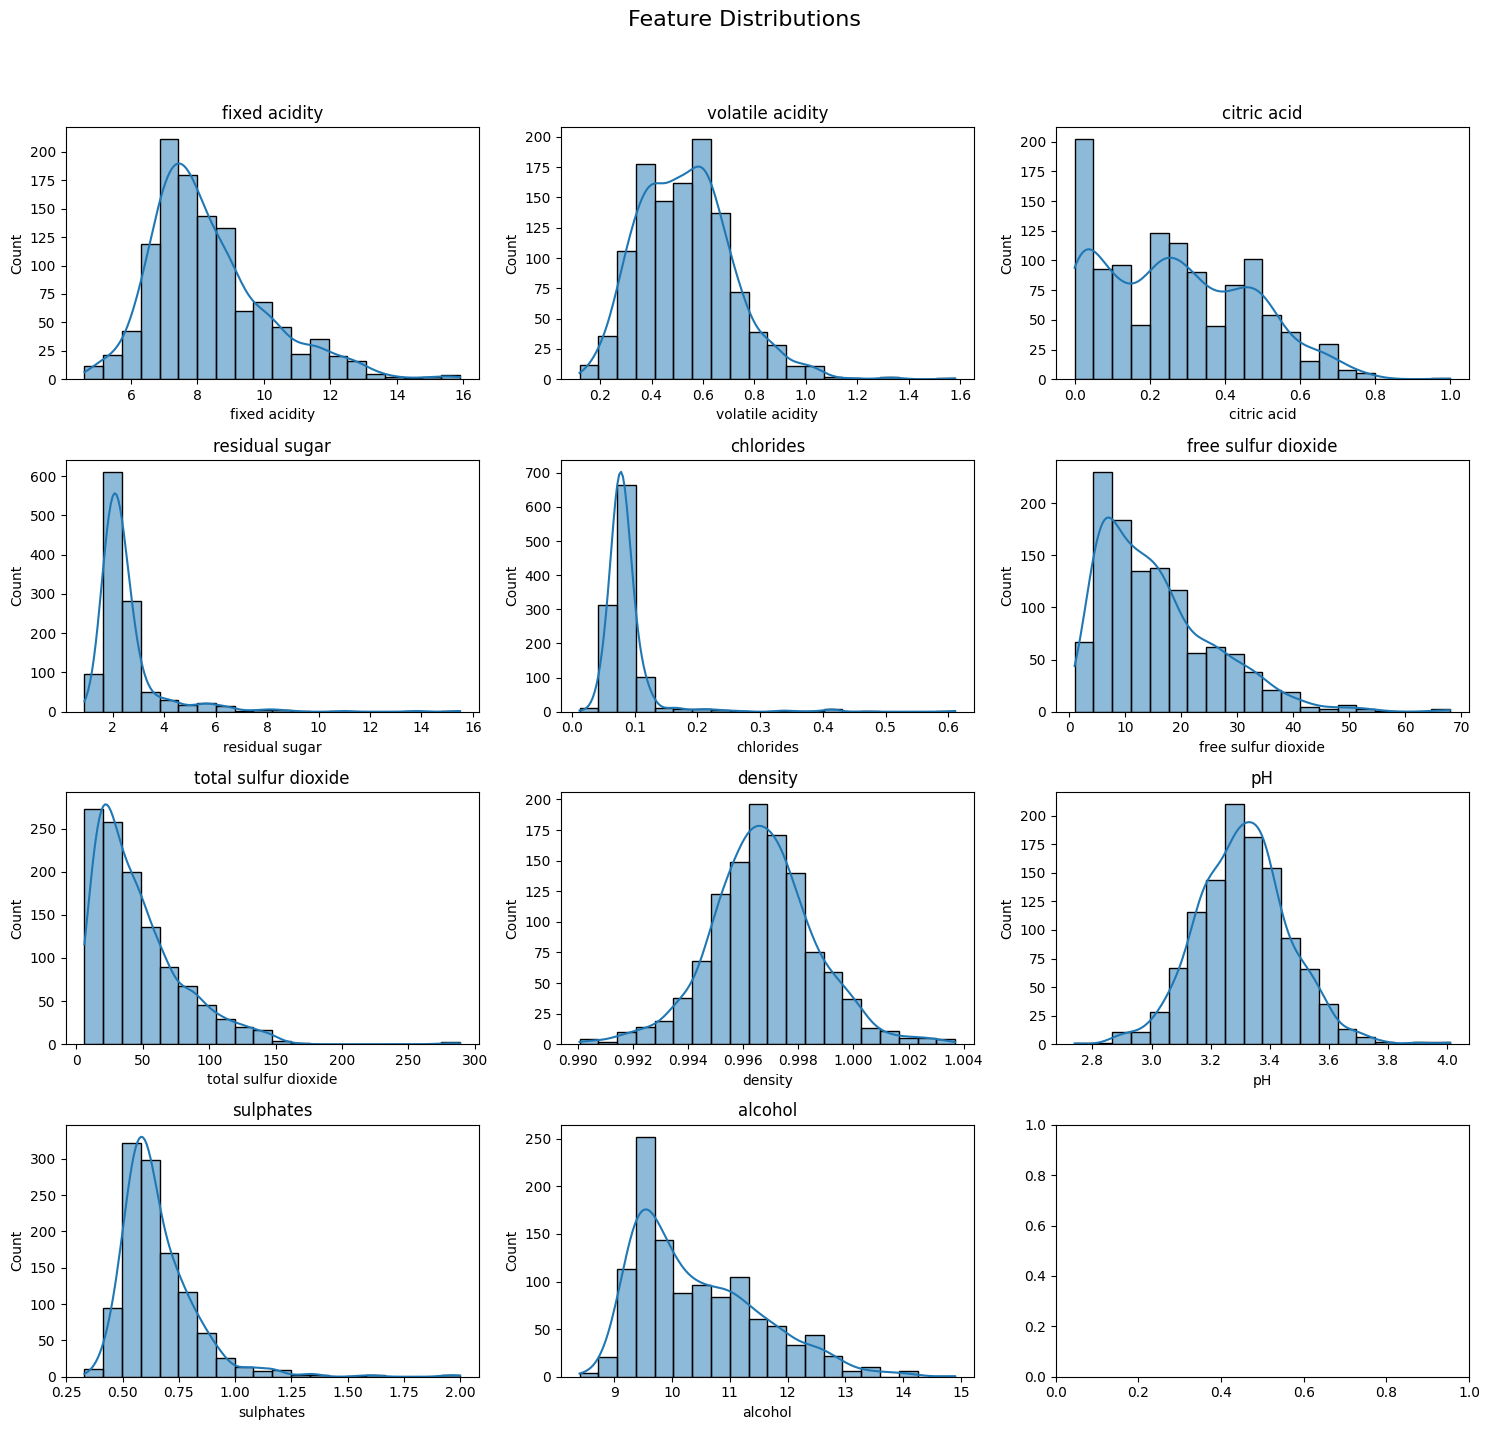

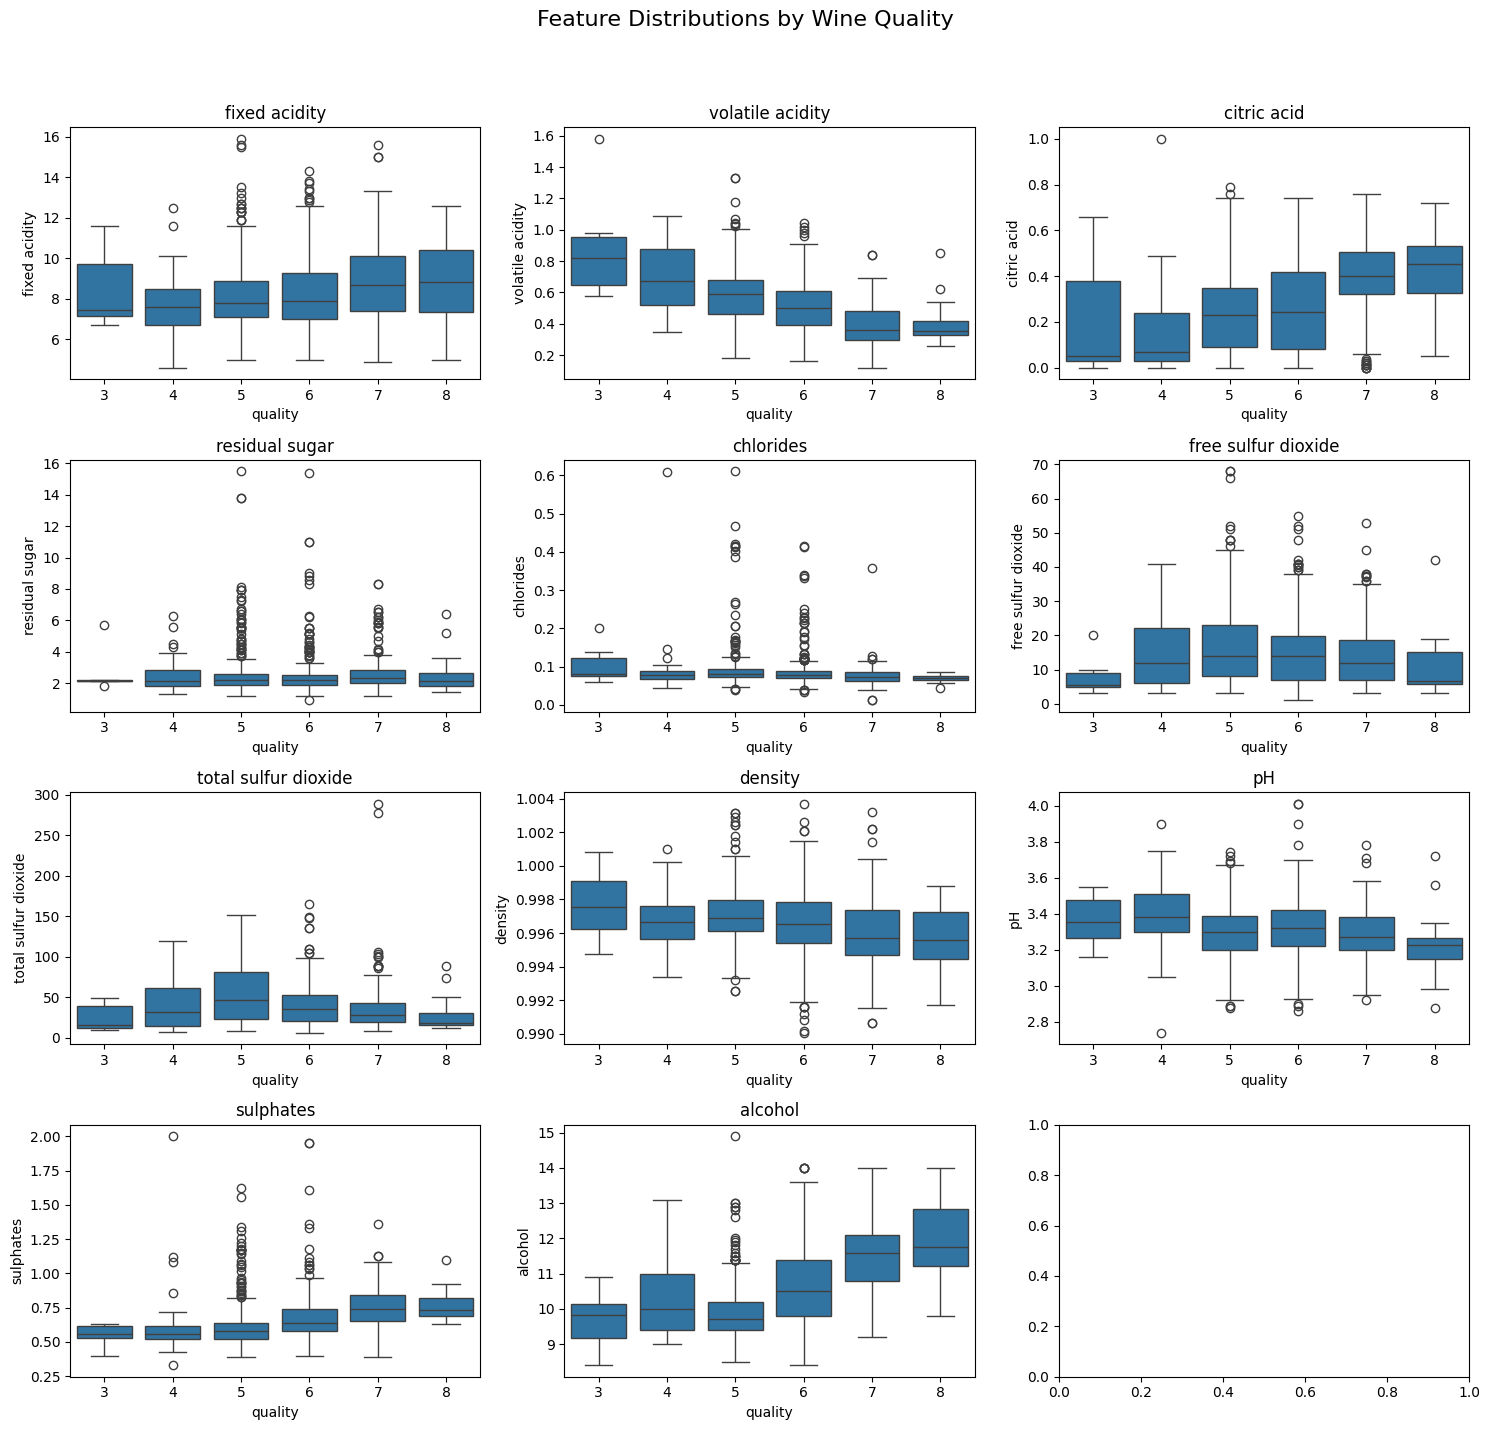

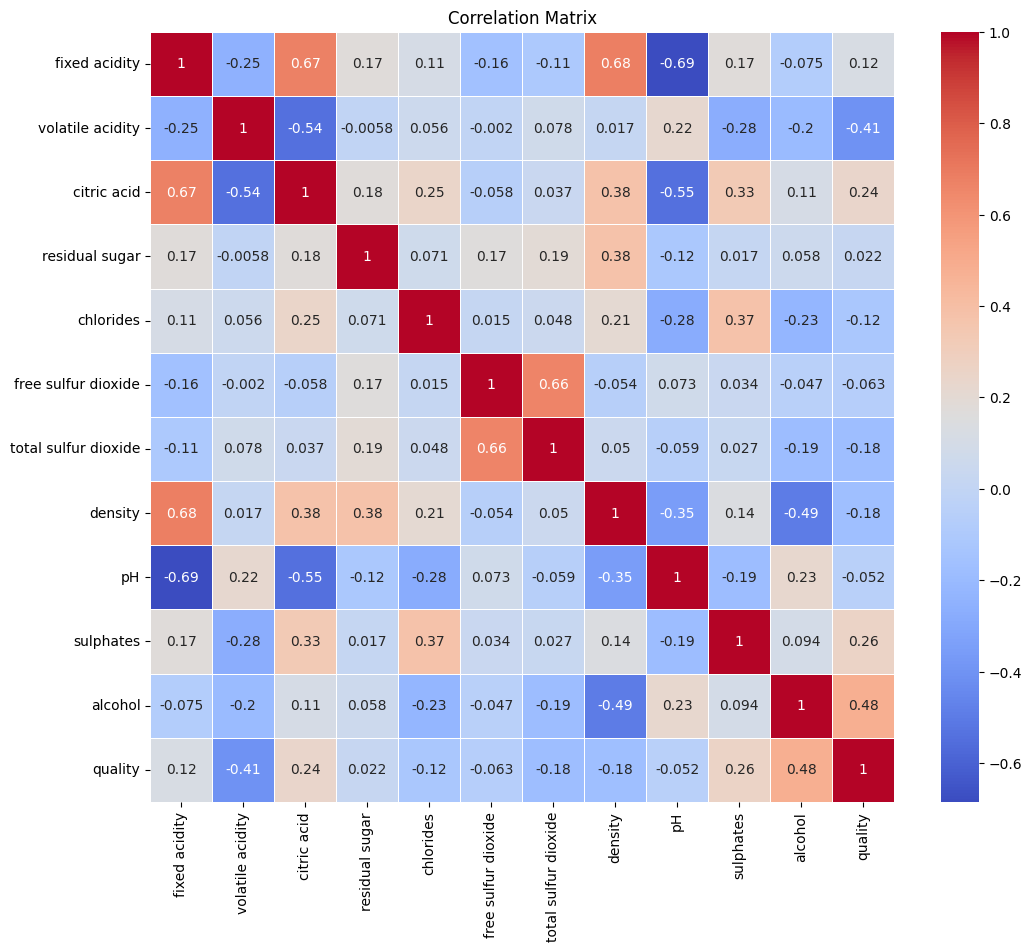

Random Forest Classifier:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.67      0.66      0.66        99
           7       0.68      0.65      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229

Accuracy: 0.6943231441048034

Stochastic Gradient Descent Classifier:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.66      0.68      0.67        96
           6       0.62      0.67      0.64        99
           7       0.55      0.23      0.32        26
           8       0.10      0.50      0.17         2

    accuracy                       

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'C:/Users/User/OIBSIP/WineQualityPrediction/data/WineQT.csv'
wine_data = pd.read_csv(file_path)

# Remove the 'Id' column
wine_data = wine_data.drop(columns=['Id'])

# Check for missing values
missing_values = wine_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Standardize the features (excluding the target variable 'quality')
features = wine_data.drop(columns=['quality'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Combine scaled features with the target variable
wine_data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
wine_data_scaled['quality'] = wine_data['quality'].values

# Histograms of feature distributions
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle('Feature Distributions', fontsize=16)

for i, column in enumerate(features.columns):
    sns.histplot(wine_data[column], bins=20, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box plots of feature distributions by quality
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle('Feature Distributions by Wine Quality', fontsize=16)

for i, column in enumerate(features.columns):
    sns.boxplot(x='quality', y=column, data=wine_data, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Calculate and display the correlation matrix
correlation_matrix = wine_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Split the data into training and testing sets
X = wine_data_scaled.drop(columns=['quality'])
y = wine_data_scaled['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Train and evaluate Stochastic Gradient Descent Classifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print("\nStochastic Gradient Descent Classifier:")
print(classification_report(y_test, y_pred_sgd, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_sgd))

# Train and evaluate Support Vector Classifier
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("\nSupport Vector Classifier:")
print(classification_report(y_test, y_pred_svc, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

In [3]:
# Conclusions about Wine Quality
print("\nConclusions about Wine Quality:")
print("1. Higher quality wines tend to have lower levels of volatile acidity and higher levels of citric acid.")
print("2. There is a noticeable correlation between higher alcohol content and higher wine quality.")
print("3. Wines with better quality scores generally exhibit lower residual sugar levels.")
print("4. Sulfates and pH levels also show some correlation with wine quality, indicating their importance in the production process.")


Conclusions about Wine Quality:
1. Higher quality wines tend to have lower levels of volatile acidity and higher levels of citric acid.
2. There is a noticeable correlation between higher alcohol content and higher wine quality.
3. Wines with better quality scores generally exhibit lower residual sugar levels.
4. Sulfates and pH levels also show some correlation with wine quality, indicating their importance in the production process.
